In [1]:
#Import API
from dora.api import DataExplorer

import pandas as pd
from datetime import date, timedelta
from matplotlib import pyplot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

explorer = DataExplorer()

In [7]:
#NEED TO UPDATE
def plot3d(X,x,y,z,points):
    fig = pyplot.figure()
    ax = Axes3D(fig)
    colors = ['green','red','blue','black','salmon','indigo','plum','seagreen','grey','yellow']
    for i in range(points):
        ax.scatter(X.results[i][x], X.results[i][y],X.results[i][z], c=colors[X.results[i][6]])
    return fig

In [10]:
def prodPerCluster(df):
    fig=plt.figure()
    maxn=df['cluster'].max()
    plt.hist(df['cluster'].values)
    plt.xlabel('Products')
    plt.ylabel('# of Products')
    plt.xticks(range(0,maxn+1))
    plt.title('Number of Products per Cluster')
    return fig

In [15]:
def clusterDist(df):
    maxn=df['cluster'].max()
    clusterStats=pd.DataFrame()
    for i in range(maxn+1):
        mask=(df['cluster']==i)
        t=df.loc[mask]
        clusterStats.loc[i,'avgNumOrders']=t['numorders'].mean()
        clusterStats.loc[i,'avgRating']=t['avgrating'].mean()
        clusterStats.loc[i,'numCategories']=t['category'].nunique()
        clusterStats.loc[i,'avgDays_on_sale']=t['days_on_sale'].mean()
    return clusterStats

statsByProduct Query

In [3]:
statsByProd=explorer.products.statsByProduct()
statsByProd=pd.DataFrame(statsByProd.results, columns=statsByProd.columns)
statsByProd.head()

,productid,asin,numorders,avgrating,category,days_on_sale
0,10001,0000000116,512,2.5000000000000000,1,629.0
1,10002,0000000868,230,4.0000000000000000,173508,277.0
2,10003,0000013714,2408,4.2857142857142857,266162,118.0
3,10004,0000015393,34,4.0000000000000000,720870,445.0
4,10005,0000029831,8480,4.8000000000000000,3564986011,1501.0


Use the API to get 10 clusters of products. A specified feature_set is not defined by the user, neither are the features that will be used for the clustering. In this case, the feature_set will be the data from statsByProduct and the features will be [numOrders, avgrating, category, days_on_sale]. 

In [12]:
#Get 10 clusters and print out the head of the dataframe
cProducts=explorer.products.clusterProducts(n_clusters=10)

In [34]:
#Lists the columns of the cCluster
cProducts.columns

array(['avgrating', 'numorders', 'days_on_sale', 'productid', 'asin',
       'category', 'cluster'], dtype=object)

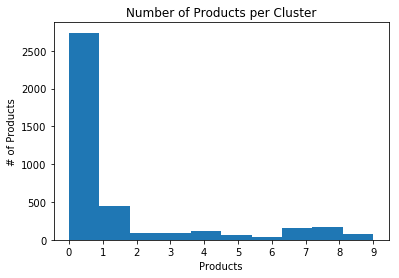

In [14]:
#Histogram of the number of customers in each cluster
df=pd.DataFrame(cProducts.results, columns=cProducts.columns)
dist=prodPerCluster(df)
dist

In [16]:
#Stats by cluster
stats=clusterDist(df)
stats

,avgNumOrders,avgRating,numCategories,avgDays_on_sale
0,466.386048,4.258213,2302.0,392.121622
1,716.256125,4.284032,358.0,557.240535
2,55.873684,4.284289,52.0,357.905263
3,1360.489362,4.168316,75.0,221.021277
4,72.000000,4.386071,93.0,291.798319
5,528.516667,4.562191,57.0,615.916667
6,139.000000,3.927008,38.0,456.605263
7,118.169935,4.277529,131.0,354.915033
8,196.806061,4.304355,159.0,711.030303
9,208.000000,4.302491,66.0,354.818182


Cluster the customers but cluster around certain product asins

In [18]:
#Cluster the products around the specified asins
c=explorer.products.clusterProducts(n_clusters=5, asin=['0000000116', '0000029831','0000013714','0000000868','0000015393'])

/Users/laurawilke/anaconda3/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:896: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


In [19]:
#Get cluster stats
df=pd.DataFrame(c.results, columns=c.columns )
stats=clusterDist(df)
stats

,avgNumOrders,avgRating,numCategories,avgDays_on_sale
0,465.903804,4.259035,2298.0,392.158010
1,393.745763,4.558160,56.0,600.915254
2,579.916667,4.242473,230.0,302.945652
3,466.792574,4.305178,652.0,539.092190
4,79.624060,4.182209,90.0,386.105263


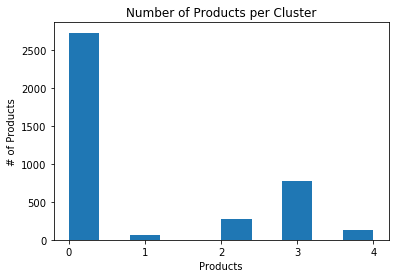

In [20]:
#Get distribution of products per cluster
dist=prodPerCluster(df)
dist

Cluster the products but specify the cluster_on parameter

In [21]:
cProducts=explorer.products.clusterProducts(n_clusters=10, cluster_on=['avgrating','numorders','days_on_sale'])

In [26]:
#Stats by cluster
df=pd.DataFrame(cProducts.results, columns=cProducts.columns )
stats=clusterDist(df)
stats

,avgNumOrders,avgRating,numCategories,avgDays_on_sale
0,43.191628,4.262176,2392.0,142.727896
1,73778.250000,4.573132,4.0,709.500000
2,22071.000000,4.484099,7.0,729.857143
3,149868.000000,4.086957,1.0,748.000000
4,11121.000000,4.440616,18.0,796.500000
5,53948.500000,4.402592,2.0,717.500000
6,3447.193182,4.095943,88.0,827.147727
7,106106.000000,4.250674,1.0,363.000000
8,165.988991,4.291992,1043.0,1072.632110
9,37710.666667,4.376757,6.0,715.500000


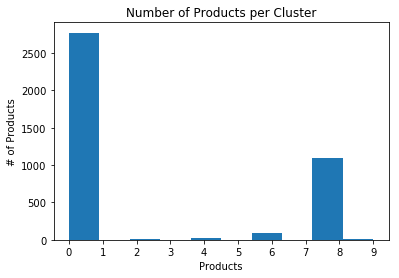

In [27]:
#Get distribution of products per cluster
dist=prodPerCluster(df)
dist